# Neural Network + SGD Visual & Conceptual Summary

## Big Picture
A neural network is a system of **layers of neurons** that take input data, pass it forward, compute a prediction, compare it to the correct answer (label), and **adjust weights** to reduce future error — using **Stochastic Gradient Descent** and **Backpropagation**.

---

## Core Components

### 1. **Neuron**
- Equation: `activation(w1*x1 + w2*x2 + ... + b)`
- Learns one tiny part of a pattern

### 2. **Layer**
- A collection of neurons
- Takes a **vector** in, outputs a new vector (features)

### 3. **Activation Function**
- Introduces **non-linearity**
- Without it, the network could only learn **straight lines**
- Common ones:
  - ReLU: `max(0, x)`
  - Sigmoid: squashes to (0, 1)
  - Softmax: used in output layer for classification

---

## 🔁 Forward Pass
- Input flows **through each layer**
- Each layer applies:  
  `z = W * x + b`  
  `a = activation(z)`
- Final output is a prediction (`ŷ`)
- Passes activations (not weights or loss) forward

---

## 🔄 Backward Pass (Backpropagation)
- Calculate **loss**:  
  `Loss = (ŷ - y)^2` or cross-entropy
- Compute how each weight contributed to loss using **derivatives**
- Update weights:  
  `w = w - learning_rate * ∂Loss/∂w`

---

## 🎓 Stochastic Gradient Descent (SGD)
- Uses **random data samples (or mini-batches)** to estimate gradient
- Makes updates **frequently** instead of after the whole dataset
- Helps with speed and escaping local minima

---

## 📦 Data Flow
### Example:
Input = [bedrooms, sqft, distance]

1. **Layer 1**:
   - Each neuron:  
     `z = w1*x1 + w2*x2 + w3*x3 + b`  
     `a = ReLU(z)`
   - Output: activations → [a1, a2, ..., aN]
2. **Layer 2**:
   - Takes [a1, a2, ..., aN] and repeats
3. **Output Layer**:
   - Produces final prediction (e.g., price)

---

## 📚 Word Embeddings (for LLMs)
- Words like "cat" → converted to vectors: `[0.12, 0.98, ..., 0.34]`
- These vectors are **learned** from context in large text datasets
- Called the **embedding layer**
- Required for language models like GPT

---

## 🧪 Probing Layers (LLMs)
- Pass data through LLM
- Take output from layer N
- Train a tiny classifier to predict:
  - Subject/object roles
  - Part-of-speech
  - Semantic facts
- This tells us **what that layer has learned**

---

## 🛡️ Moderation & Safety
- Safety filters and metaprompts guide GPTs
- These are **not neural layers**
- Usually applied **before or after model output**

---  

## ❗ Common Misunderstandings Clarified

| Confusion | Clarification |
|----------|---------------|
| "We only use backward pass" | ❌ Forward pass always comes first to make predictions |
| "We pass weights between layers" | ❌ We pass activations (computed values), not weights or loss |
| "We label every layer" | ❌ Only final outputs are labeled — all layers learn features from end loss |
| "Cat becomes random numbers" | ✅ It becomes a vector from a learned embedding table |

---  

## ✅ Visual Summary of Data Flow

```text
Input → Layer 1 → Layer 2 → Output → Loss
         ↓         ↓         ↓
      activations passed layer to layer


Each layer transforms the input into increasingly abstract features, until the final output is compared to the actual target (label).

---  

## 🧠 Key Equations

**Forward Pass:**
z = W * x + b  
a = activation(z)  

**Loss (MSE):**
Loss = ½ (y_pred - y_true)^2  

**Gradients:**
∂Loss/∂w = (y_pred - y_true) * x  
∂Loss/∂b = (y_pred - y_true)  

**Gradient Descent Update Rule:**
w = w - learning_rate * ∂Loss/∂w  
b = b - learning_rate * ∂Loss/∂b  

---  

## End Goal of Training
Use repeated forward passes + backward passes (via gradient descent or stochastic gradient descent) to:

- Minimize the loss function
- Update the model’s weights
- Improve predictions over time

The network **learns patterns** from data by adjusting its weights to reduce its mistakes.

---

In [18]:
# House Price Prediction

data = [
    (1000, 200000),
    (1500, 250000),
    (800, 160000),
    (1200, 220000),
    (1800, 300000)
]

In [19]:
# Initial start of weights and biases
w = 100
b = 0

In [20]:
# Hyperparameters
learning_rate = 0.000001
epochs = 10

In [3]:
def predict(x): # No activation function
    return w * x + b 

def compute_loss(y_true, y_pred):
    return 0.5 * (y_pred - y_true) ** 2

In [451]:
# Training
for epoch in range(epochs):
    print(f'Epoch {epoch + 1}')

    for x, y_true in data:
        
        # Forward Pass
        y_pred = predict(x)
        loss = compute_loss(y_true, y_pred)

        # Backward Pass
        dl_dw = (y_pred - y_true) * x   # gradient w.r.t w
        dl_db = (y_pred - y_true)       # gradient w.r.t b

        # Update weights
        w = w - learning_rate * dl_dw
        b = b - learning_rate * dl_db

        print(f'    sqft = {x}, actual = {y_true}, pred = {int(y_pred)}, loss = {int(loss)}')
        print(f'    dL_dw: {round(dl_dw, 2)}, dL_db: {round(dl_db, 2)}')

    
    print(f'Updated w: {round(w, 2)}, b: {round(b, 2)}\n')

Epoch 1
    sqft = 1000, actual = 200000, pred = 119149, loss = 3268404314
    dL_dw: -80850532.64, dL_db: -80850.53
    sqft = 1500, actual = 250000, pred = 299999, loss = 1249987297
    dL_dw: 74999618.91, dL_db: 49999.75
    sqft = 800, actual = 160000, pred = 100000, loss = 1799971819
    dL_dw: -47999624.25, dL_db: -59999.53
    sqft = 1200, actual = 220000, pred = 207599, loss = 76880455
    dL_dw: -14880044.05, dL_db: -12400.04
    sqft = 1800, actual = 300000, pred = 338183, loss = 728995803
    dL_dw: 68730581.32, dL_db: 38183.66
Updated w: 119.15, b: 0.73

Epoch 2
    sqft = 1000, actual = 200000, pred = 119149, loss = 3268398996
    dL_dw: -80850466.87, dL_db: -80850.47
    sqft = 1500, actual = 250000, pred = 299999, loss = 1249985670
    dL_dw: 74999570.11, dL_db: 49999.71
    sqft = 800, actual = 160000, pred = 100000, loss = 1799968695
    dL_dw: -47999582.61, dL_db: -59999.48
    sqft = 1200, actual = 220000, pred = 207599, loss = 76880510
    dL_dw: -14880049.36, dL_db

> Gradient descent is an optimization algorithm used to minimize a **loss function** by adjusting model parameters (weights & bias) in the direction that **reduces the error**.


"By-the-Book" Gradient Descent (Batch GD)

| Concept           | Description                                                                 |
|------------------|-----------------------------------------------------------------------------|
| Data Used         | **All training data** (entire dataset)                                     |
| Update Frequency  | **One update per epoch** (after full pass through data)                    |
| Memory Usage      | High (must store all data)                                                 |
| Convergence       | Smooth but can be slow                                                     |
| Risk              | Can get stuck in local minima (no randomness)                             |
  
Stochastic Gradient Descent (SGD)

| Concept           | Description                                               |
|------------------|-----------------------------------------------------------|
| **Data Used**     | One data point at a time (picked randomly)                |
| **Update Frequency** | One update per sample                                 |
| **Memory Usage**  | Low (one sample at a time)                                |
| **Convergence**   | Fast but noisy (bounces around the loss surface)          |
| **Benefit**       | Escapes local minima better                               |



Batch Gradient Descent (Full Dataset)
  Step →           🟢────────🟢────────🟢────────🟢  
  Error →          ◯ Smooth decline (but slow)

Stochastic Gradient Descent (One Sample)
  Step →           🔺^^🔻--🔺^^🔻--🔺  
  Error →          ◯ Noisy but faster descent  

Initial w: 0.74, b: 0.7

Epoch 1
  x=1.5, true=250.0, pred=1.82, loss=30797.28
  x=0.8, true=160.0, pred=6.76, loss=11741.67
  x=1.0, true=200.0, pred=10.41, loss=17972.41
  x=1.2, true=220.0, pred=15.72, loss=20865.53
  x=1.8, true=300.0, pred=26.73, loss=37339.28
  Updated w: 14.96, b: 11.39

Epoch 2
  x=1.2, true=220.0, pred=29.34, loss=18175.97
  x=1.8, true=300.0, pred=44.34, loss=32681.55
  x=1.5, true=250.0, pred=48.62, loss=20276.23
  x=1.0, true=200.0, pred=42.73, loss=12366.3
  x=0.8, true=160.0, pred=40.59, loss=7129.25
  Updated w: 27.4, b: 20.63

Epoch 3
  x=1.8, true=300.0, pred=69.95, loss=26462.43
  x=1.0, true=200.0, pred=54.47, loss=10589.46
  x=0.8, true=160.0, pred=50.78, loss=5964.26
  x=1.2, true=220.0, pred=66.12, loss=11839.52
  x=1.5, true=250.0, pred=80.59, loss=14350.1
  Updated w: 38.25, b: 28.71

Epoch 4
  x=1.0, true=200.0, pred=66.97, loss=8848.84
  x=1.8, true=300.0, pred=101.3, loss=19741.69
  x=1.2, true=220.0, pred=83.82, loss=9271.95
  x=1.5, true=25

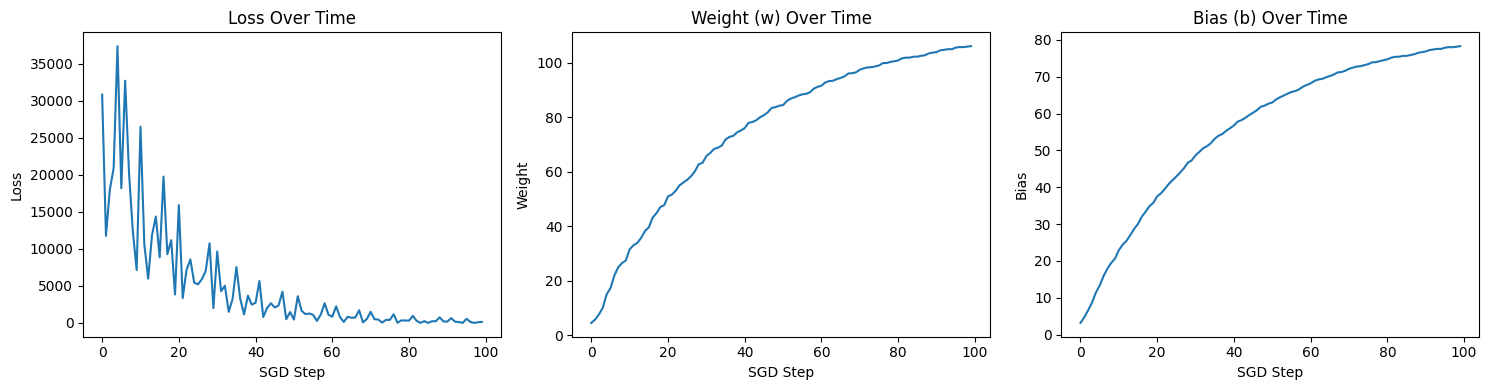

In [ ]:
import matplotlib.pyplot as plt
import random
import time

data = [
    (1000, 200000),
    (1500, 250000),
    (800, 160000),
    (1200, 220000),
    (1800, 300000)
]

data = [(x / 1000, y / 1000) for x, y in data] 

w = random.uniform(0, 1)  
b = random.uniform(0, 1)  

# Hyperparameters
learning_rate = 0.01
epochs = 20


loss_history = []
w_history = []
b_history = []

def predict(x):
    return w * x + b

def compute_loss(y_true, y_pred):
    return 0.5 * (y_pred - y_true) ** 2  

print(f"Initial w: {round(w, 2)}, b: {round(b, 2)}\n")

for epoch in range(epochs):
    print(f"Epoch {epoch + 1}")

    random.shuffle(data)

    for x, y_true in data:
        # Forward Pass
        y_pred = predict(x)
        loss = compute_loss(y_true, y_pred)

        # Backward Pass
        dl_dw = (y_pred - y_true) * x
        dl_db = (y_pred - y_true)

        # SGD Using 1 Sample
        w -= learning_rate * dl_dw
        b -= learning_rate * dl_db

        loss_history.append(loss)
        w_history.append(w)
        b_history.append(b)

        print(f"  x={round(x,2)}, true={round(y_true,2)}, pred={round(y_pred,2)}, loss={round(loss,2)}")
        time.sleep(0.5)

    print(f"  Updated w: {round(w, 2)}, b: {round(b, 2)}\n")


plt.figure(figsize=(15, 4))

# Loss
plt.subplot(1, 3, 1)
plt.plot(loss_history)
plt.title("Loss Over Time")
plt.xlabel("SGD Step")
plt.ylabel("Loss")

# Weight
plt.subplot(1, 3, 2)
plt.plot(w_history)
plt.title("Weight (w) Over Time")
plt.xlabel("SGD Step")
plt.ylabel("Weight")

# Bias
plt.subplot(1, 3, 3)
plt.plot(b_history)
plt.title("Bias (b) Over Time")
plt.xlabel("SGD Step")
plt.ylabel("Bias")

plt.tight_layout()
plt.show()

Epoch 1
  pred=-0.05, actual=200.0, loss=20009.86
  pred=4.41, actual=160.0, loss=12103.38
  pred=-2.82, actual=250.0, loss=31959.13
  pred=3.99, actual=300.0, loss=43809.58
  pred=6.72, actual=220.0, loss=22743.16
  w1=2.75, w2=3.17, w3=-1.31, b=11.77

Epoch 2
  pred=20.89, actual=300.0, loss=38951.83
  pred=9.17, actual=220.0, loss=22224.9
  pred=10.81, actual=200.0, loss=17896.52
  pred=30.64, actual=250.0, loss=24059.41
  pred=-8.73, actual=160.0, loss=14235.7
  w1=4.55, w2=4.72, w3=-2.83, b=22.45

Epoch 3
  pred=37.76, actual=300.0, loss=34385.61
  pred=17.65, actual=200.0, loss=16626.12
  pred=20.34, actual=220.0, loss=19931.27
  pred=44.72, actual=250.0, loss=21069.51
  pred=-4.57, actual=160.0, loss=13541.6
  w1=6.12, w2=6.06, w3=-4.16, b=32.59

Epoch 4
  pred=46.67, actual=250.0, loss=20670.83
  pred=2.34, actual=160.0, loss=12428.9
  pred=54.52, actual=300.0, loss=30129.91
  pred=31.4, actual=220.0, loss=17785.38
  pred=32.69, actual=200.0, loss=13995.96
  w1=7.63, w2=7.38, w

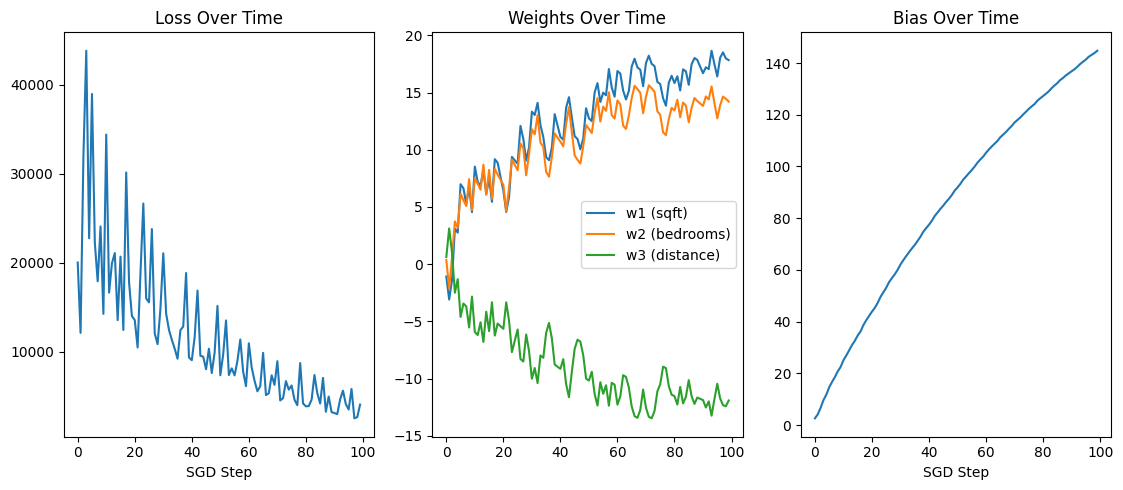

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import random
from sklearn.preprocessing import StandardScaler

df = pd.DataFrame({
    'sqft': [1000, 1500, 800, 1200, 1800],
    'bedrooms': [3, 4, 2, 3, 4],
    'distance': [5, 3, 10, 7, 2],
    'price': [200000, 250000, 160000, 220000, 300000]
})

scaler = StandardScaler()
features = ['sqft', 'bedrooms', 'distance']
df_scaled = df.copy()
df_scaled[features] = scaler.fit_transform(df[features])
df_scaled['price'] = df['price'] / 1000  


data = [((row.sqft, row.bedrooms, row.distance), row.price) for _, row in df_scaled.iterrows()]


w1, w2, w3 = [random.uniform(0, 1) for _ in range(3)]
b = random.uniform(0, 1)

learning_rate = 0.01
epochs = 20


loss_history = []
w1_history, w2_history, w3_history, b_history = [], [], [], []

def predict(x1, x2, x3):
    return w1 * x1 + w2 * x2 + w3 * x3 + b

def compute_loss(y_true, y_pred):
    return 0.5 * (y_pred - y_true) ** 2

for epoch in range(epochs):
    print(f"Epoch {epoch + 1}")
    random.shuffle(data)

    for (x1, x2, x3), y_true in data:
        # Forward
        y_pred = predict(x1, x2, x3)
        loss = compute_loss(y_true, y_pred)

        # Backward (SGD)
        dl_dw1 = (y_pred - y_true) * x1
        dl_dw2 = (y_pred - y_true) * x2
        dl_dw3 = (y_pred - y_true) * x3
        dl_db = (y_pred - y_true)

        # Update
        w1 -= learning_rate * dl_dw1
        w2 -= learning_rate * dl_dw2
        w3 -= learning_rate * dl_dw3
        b  -= learning_rate * dl_db

        # Log
        loss_history.append(loss)
        w1_history.append(w1)
        w2_history.append(w2)
        w3_history.append(w3)
        b_history.append(b)

        print(f"  pred={round(y_pred,2)}, actual={round(y_true,2)}, loss={round(loss,2)}")

    print(f"  w1={round(w1,2)}, w2={round(w2,2)}, w3={round(w3,2)}, b={round(b,2)}\n")

plt.figure(figsize=(15, 5))

plt.subplot(1, 4, 1)
plt.plot(loss_history)
plt.title("Loss Over Time")
plt.xlabel("SGD Step")

plt.subplot(1, 4, 2)
plt.plot(w1_history, label="w1 (sqft)")
plt.plot(w2_history, label="w2 (bedrooms)")
plt.plot(w3_history, label="w3 (distance)")
plt.title("Weights Over Time")
plt.legend()

plt.subplot(1, 4, 3)
plt.plot(b_history)
plt.title("Bias Over Time")
plt.xlabel("SGD Step")

plt.tight_layout()
plt.show()

In [14]:
import numpy as np
import plotly.graph_objs as go
from sklearn.preprocessing import StandardScaler

# --- Simulated House Price Data ---
X = np.array([
    [1000, 3, 5],
    [1500, 4, 3],
    [800, 2, 10],
    [1200, 3, 7],
    [1800, 4, 2]
])
y = np.array([200000, 250000, 160000, 220000, 300000]) / 1000  # normalize

# --- Normalize Features ---
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# --- Initial Weights (SGD starts here) ---
w1, w2, w3 = np.random.uniform(0, 1, 3)
b = np.random.uniform(0, 1)

learning_rate = 0.01
epochs = 15

w1_path = []
w2_path = []
loss_path = []

# --- SGD Loop (w3 fixed to simplify visualization) ---
for epoch in range(epochs):
    indices = np.random.permutation(len(X_scaled))
    for i in indices:
        x1, x2, x3 = X_scaled[i]
        y_true = y[i]
        y_pred = w1 * x1 + w2 * x2 + w3 * x3 + b
        loss = 0.5 * (y_pred - y_true) ** 2

        # Gradients
        dl_dw1 = (y_pred - y_true) * x1
        dl_dw2 = (y_pred - y_true) * x2
        dl_db = (y_pred - y_true)

        # Update weights
        w1 -= learning_rate * dl_dw1
        w2 -= learning_rate * dl_dw2
        b  -= learning_rate * dl_db

        # Track path
        w1_path.append(w1)
        w2_path.append(w2)
        loss_path.append(loss)

# --- Loss Surface ---
W1, W2 = np.meshgrid(np.linspace(min(w1_path)-0.5, max(w1_path)+0.5, 30),
                     np.linspace(min(w2_path)-0.5, max(w2_path)+0.5, 30))
Z = np.zeros_like(W1)

for i in range(W1.shape[0]):
    for j in range(W1.shape[1]):
        total_loss = 0
        for k in range(len(X_scaled)):
            x1, x2, x3 = X_scaled[k]
            y_true = y[k]
            y_pred = W1[i, j]*x1 + W2[i, j]*x2 + w3*x3 + b
            total_loss += 0.5 * (y_pred - y_true)**2
        Z[i, j] = total_loss / len(X_scaled)

# --- Plotly 3D Visualization ---
surface = go.Surface(x=W1, y=W2, z=Z, colorscale='Viridis', opacity=0.8)

path = go.Scatter3d(
    x=w1_path,
    y=w2_path,
    z=loss_path,
    mode='lines+markers',
    line=dict(color='red', width=4),
    marker=dict(size=3, color='red'),
    name='SGD Path'
)

fig = go.Figure(data=[surface, path])
fig.update_layout(
    title='SGD Descent on Loss Surface (w1 vs w2)',
    scene=dict(
        xaxis_title='Weight w1 (sqft)',
        yaxis_title='Weight w2 (bedrooms)',
        zaxis_title='Loss'
    ),
    width=800,
    height=600
)

fig.show()